# **Hierarchical Clustering - Practical Implementation**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = sns.load_dataset('iris')

In [3]:
# dropping target column
df.drop('species', axis=1, inplace=True)

**Standardizing**

In [4]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [5]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

**Dimensionality Reduction**

In [6]:
# importing PCA
from sklearn.decomposition import PCA

In [7]:
# applying PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)

## **Hierarchical Clustering Implementation**

### **Agglomerative Clustering**

**Dendogram Visualization**

In [9]:
# importing hierarchy
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidean Distance')

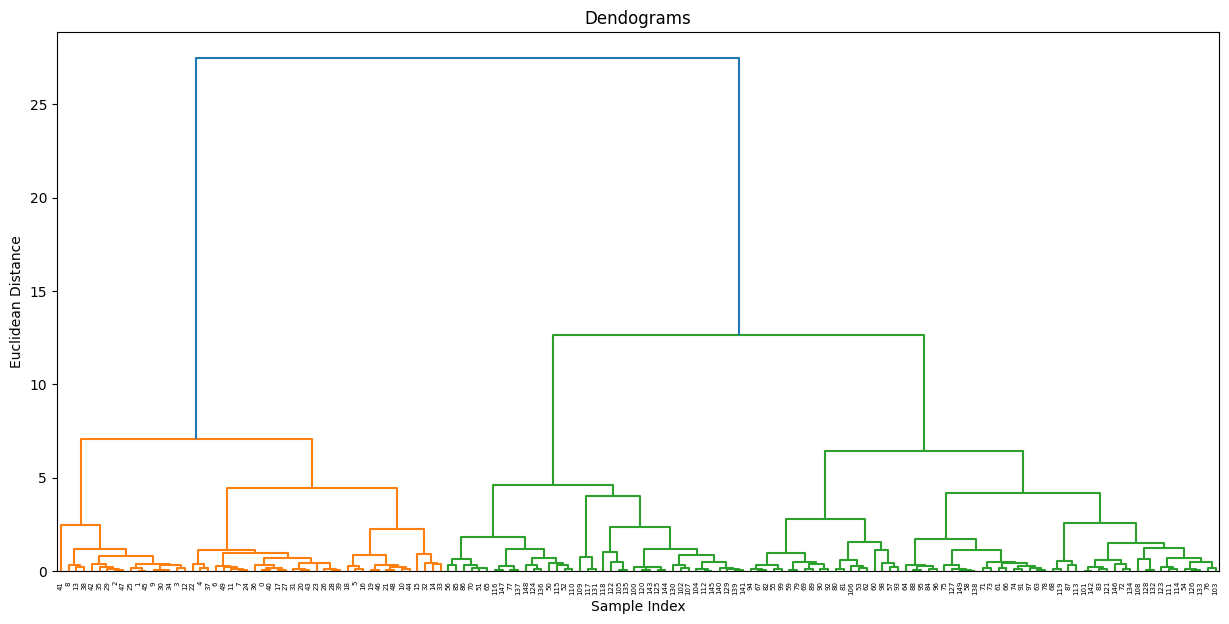

In [14]:
# plotting dendogram
plt.figure(figsize=(15, 7))
plt.title('Dendograms')

sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

**Implementing Agglomerative Clustering**

In [15]:
# importing AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [16]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering(affinity='euclidean')

In [17]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

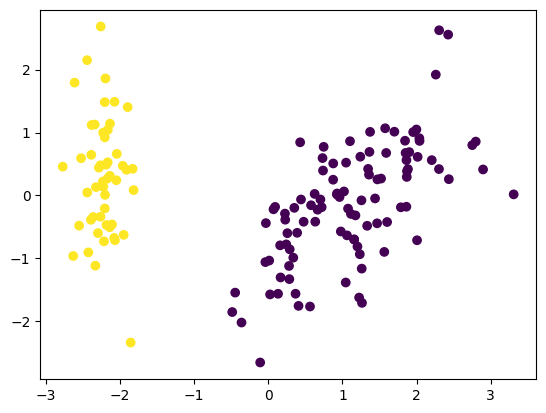

In [18]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)

**Testing**

In [19]:
# importing metrics
from sklearn.metrics import silhouette_score

In [20]:
silhoutte_coefficients = []

for k in range(2, 11):
  agglo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  agglo.fit(X_scaled)
  score = silhouette_score(X_scaled, agglo.labels_)
  silhoutte_coefficients.append(score)

Text(0, 0.5, 'Silhouette Score')

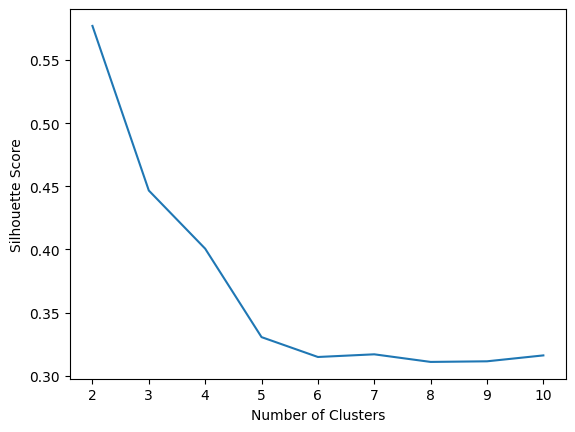

In [21]:
# plotting silhoutte Score
plt.plot(range(2, 11), silhoutte_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')